In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data_path = "/content/Wholesale customers data.csv"
data = pd.read_csv(data_path)

# Drop non-numeric columns for clustering
data_clustering = data.drop(['Channel', 'Region'], axis=1)

imputer = SimpleImputer(strategy='median')  # or another strategy like 'mean'
data_imputed = imputer.fit_transform(data_clustering)

# Scale the imputed data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)


# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Function to find the optimum number of clusters using the silhouette score
def find_optimal_clusters(data, cluster_range, model_func):
    silhouette_scores = []
    for n_clusters in cluster_range:
        model = model_func(n_clusters)
        cluster_labels = model.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")
    optimal_n_clusters = cluster_range[np.argmax(silhouette_scores)]
    print(f"Optimal number of clusters: {optimal_n_clusters}")
    return optimal_n_clusters

# Function to create KMeans model with the optimal number of clusters
def create_optimal_kmeans(data, cluster_range):
    optimal_n_clusters = find_optimal_clusters(data, cluster_range, KMeans)
    kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
    kmeans.fit(data)
    return kmeans

# Function to create Agglomerative Clustering model with the optimal number of clusters
def create_optimal_agglo(data, cluster_range):
    optimal_n_clusters = find_optimal_clusters(data, cluster_range, AgglomerativeClustering)
    agglo = AgglomerativeClustering(n_clusters=optimal_n_clusters)
    agglo.fit(data)
    return agglo

# Function to create DBSCAN model and find the number of clusters formed
def create_dbscan(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(data)
    n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
    print(f"Number of clusters formed by DBSCAN: {n_clusters}")
    return dbscan

# Define cluster range
cluster_range = range(2, 10)

# Create KMeans model with the optimal number of clusters
kmeans_model = create_optimal_kmeans(data_pca, cluster_range)

# Create Agglomerative Clustering model with the optimal number of clusters
agglo_model = create_optimal_agglo(data_pca, cluster_range)

# Define DBSCAN parameters
eps = 0.5
min_samples = 5

# Create DBSCAN model
dbscan_model = create_dbscan(data_pca, eps, min_samples)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 2 clusters: 0.6362204119808382
Silhouette Score for 3 clusters: 0.6266567871676367
Silhouette Score for 4 clusters: 0.48521964473348217
Silhouette Score for 5 clusters: 0.4858297956992906


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 6 clusters: 0.47157950620691297
Silhouette Score for 7 clusters: 0.40916330075766905


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 8 clusters: 0.41476082049867946
Silhouette Score for 9 clusters: 0.4270780266172919
Optimal number of clusters: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 2 clusters: 0.7582874039778558
Silhouette Score for 3 clusters: 0.671106831440861
Silhouette Score for 4 clusters: 0.43944967997339474
Silhouette Score for 5 clusters: 0.44255823296887203
Silhouette Score for 6 clusters: 0.4169116406936784
Silhouette Score for 7 clusters: 0.41574429801235124
Silhouette Score for 8 clusters: 0.4209118965056938
Silhouette Score for 9 clusters: 0.4216492899665764
Optimal number of clusters: 2
Number of clusters formed by DBSCAN: 1


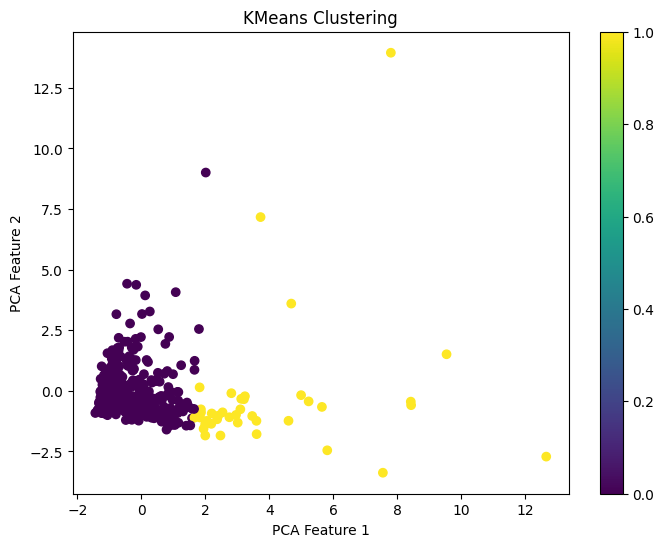

In [8]:
# Plotting the clusters
def plot_clusters(data, model, title):
    plt.figure(figsize=(8, 6))
    clusters = model.labels_
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', marker='o')
    plt.title(title)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.colorbar()
    plt.show()

# Plot KMeans clusters
plot_clusters(data_pca, kmeans_model, 'KMeans Clustering')


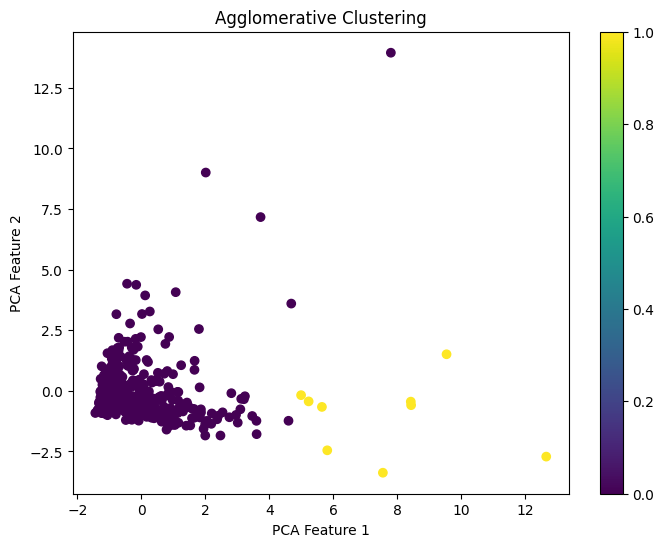

In [9]:

# Plot Agglomerative Clustering clusters
plot_clusters(data_pca, agglo_model, 'Agglomerative Clustering')



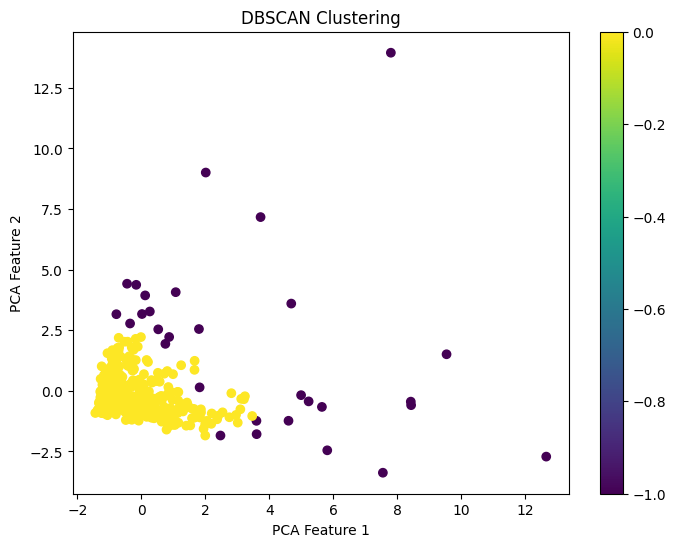

In [10]:
# Plot DBSCAN clusters
plot_clusters(data_pca, dbscan_model, 'DBSCAN Clustering')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


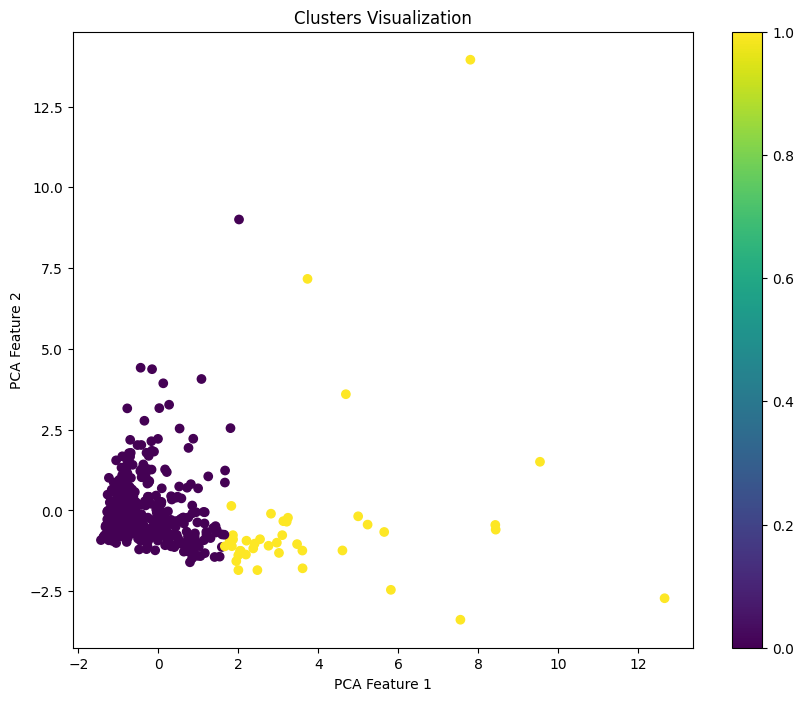

In [11]:

# Run KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(data_pca)

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('Clusters Visualization')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar()
plt.show()
